### Lab6
### Exercise 1 - Time Series Analysis
### Use the “employment.csv” data set and perform time series analysis and visualization through the following questions.
### DATE : 07-10-2022
### Name : Kartabya Krishna
### RegNo : 210968244
### Batch : 4

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [34]:
df=pd.read_csv("employment.csv")
df

datestamp  Agriculture  Business services  Construction  \
0    2000-01-01         10.3                5.7           9.7   
1    2000-02-01         11.5                5.2          10.6   
2    2000-03-01         10.4                5.4           8.7   
3    2000-04-01          8.9                4.5           5.8   
4    2000-05-01          5.1                4.7           5.0   
..          ...          ...                ...           ...   
117  2009-10-01         11.8               10.3          18.7   
118  2009-11-01         12.6               10.6          19.4   
119  2009-12-01         19.7               10.3          22.7   
120  2010-01-01         21.3               11.1          24.7   
121  2010-02-01         18.8               12.0          27.1   

     Durable goods manufacturing  Education and Health  Finance  Government  \
0                            3.2                   2.3      2.7         2.1   
1                            2.9                   2.2      2.8         2.0   
2                            2.8                   2.5      2.6         1.5   
3                            3.4                   2.1      2.3         1.3   
4                            3.4                   2.7      2.2         1.9   
..                           ...                   ...      ...         ...   
117                         12.9                   6.0      7.0         3.5   
118                         12.7                   5.5      6.7         3.4   
119                         13.3                   5.6      7.2         3.6   
120                         14.1                   5.5      6.6         4.3   
121                         13.6                   5.6      7.5         4.0   

     Information  Leisure and hospitality  Manufacturing  \
0            3.4                      7.5            3.6   
1            2.9                      7.5            3.4   
2            3.6                      7.4            3.6   
3            2.4                      6.1            3.7   
4            3.5                      6.2            3.4   
..           ...                      ...            ...   
117          8.2                     12.4           12.2   
118          7.6                     11.9           12.5   
119          8.5                     12.6           11.9   
120         10.0                     14.2           13.0   
121         10.0                     12.7           12.1   

     Mining and Extraction  Nondurable goods manufacturing  Other  \
0                      3.9                             4.4    4.9   
1                      5.5                             4.2    4.1   
2                      3.7                             5.1    4.3   
3                      4.1                             4.0    4.2   
4                      5.3                             3.6    4.5   
..                     ...                             ...    ...   
117                   10.8                            10.9    8.5   
118                   12.0                            12.0    8.0   
119                   11.8                             9.5    8.2   
120                    9.1                            11.1   10.0   
121                   10.7                             9.7    9.9   

     Self-employed  Transportation and Utilities  Wholesale and Retail Trade  
0              2.3                           4.3                         5.0  
1              2.5                           4.0                         5.2  
2              2.0                           3.5                         5.1  
3              2.0                           3.4                         4.1  
4              1.9                           3.4                         4.3  
..             ...                           ...                         ...  
117            5.9                           8.6                         9.6  
118            5.7                           8.5                         9.2  
119            

In [35]:
df.isnull().any()

datestamp                         False
Agriculture                       False
Business services                 False
Construction                      False
Durable goods manufacturing       False
Education and Health              False
Finance                           False
Government                        False
Information                       False
Leisure and hospitality           False
Manufacturing                     False
Mining and Extraction             False
Nondurable goods manufacturing    False
Other                             False
Self-employed                     False
Transportation and Utilities      False
Wholesale and Retail Trade        False
dtype: bool

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   datestamp                       122 non-null    object 
 1   Agriculture                     122 non-null    float64
 2   Business services               122 non-null    float64
 3   Construction                    122 non-null    float64
 4   Durable goods manufacturing     122 non-null    float64
 5   Education and Health            122 non-null    float64
 6   Finance                         122 non-null    float64
 7   Government                      122 non-null    float64
 8   Information                     122 non-null    float64
 9   Leisure and hospitality         122 non-null    float64
 10  Manufacturing                   122 non-null    float64
 11  Mining and Extraction           122 non-null    float64
 12  Nondurable goods manufacturing  122 

### Q1. Convert datestamp column to a datetime object and Set the datestamp columns as the index of your DataFrame. Check if there are missing values in each column.

In [37]:
df['datestamp'] = pd.to_datetime(df['datestamp'])
df

datestamp  Agriculture  Business services  Construction  \
0   2000-01-01         10.3                5.7           9.7   
1   2000-02-01         11.5                5.2          10.6   
2   2000-03-01         10.4                5.4           8.7   
3   2000-04-01          8.9                4.5           5.8   
4   2000-05-01          5.1                4.7           5.0   
..         ...          ...                ...           ...   
117 2009-10-01         11.8               10.3          18.7   
118 2009-11-01         12.6               10.6          19.4   
119 2009-12-01         19.7               10.3          22.7   
120 2010-01-01         21.3               11.1          24.7   
121 2010-02-01         18.8               12.0          27.1   

     Durable goods manufacturing  Education and Health  Finance  Government  \
0                            3.2                   2.3      2.7         2.1   
1                            2.9                   2.2      2.8         2.0   
2                            2.8                   2.5      2.6         1.5   
3                            3.4                   2.1      2.3         1.3   
4                            3.4                   2.7      2.2         1.9   
..                           ...                   ...      ...         ...   
117                         12.9                   6.0      7.0         3.5   
118                         12.7                   5.5      6.7         3.4   
119                         13.3                   5.6      7.2         3.6   
120                         14.1                   5.5      6.6         4.3   
121                         13.6                   5.6      7.5         4.0   

     Information  Leisure and hospitality  Manufacturing  \
0            3.4                      7.5            3.6   
1            2.9                      7.5            3.4   
2            3.6                      7.4            3.6   
3            2.4                      6.1            3.7   
4            3.5                      6.2            3.4   
..           ...                      ...            ...   
117          8.2                     12.4           12.2   
118          7.6                     11.9           12.5   
119          8.5                     12.6           11.9   
120         10.0                     14.2           13.0   
121         10.0                     12.7           12.1   

     Mining and Extraction  Nondurable goods manufacturing  Other  \
0                      3.9                             4.4    4.9   
1                      5.5                             4.2    4.1   
2                      3.7                             5.1    4.3   
3                      4.1                             4.0    4.2   
4                      5.3                             3.6    4.5   
..                     ...                             ...    ...   
117                   10.8                            10.9    8.5   
118                   12.0                            12.0    8.0   
119                   11.8                             9.5    8.2   
120                    9.1                            11.1   10.0   
121                   10.7                             9.7    9.9   

     Self-employed  Transportation and Utilities  Wholesale and Retail Trade  
0              2.3                           4.3                         5.0  
1              2.5                           4.0                         5.2  
2              2.0                           3.5                         5.1  
3              2.0                           3.4                         4.1  
4              1.9                           3.4                         4.3  
..             ...                           ...                         ...  
117            5.9                           8.6                         9.6  
118            5.7                           8.5                         9.2  
119            5.9        

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   datestamp                       122 non-null    datetime64[ns]
 1   Agriculture                     122 non-null    float64       
 2   Business services               122 non-null    float64       
 3   Construction                    122 non-null    float64       
 4   Durable goods manufacturing     122 non-null    float64       
 5   Education and Health            122 non-null    float64       
 6   Finance                         122 non-null    float64       
 7   Government                      122 non-null    float64       
 8   Information                     122 non-null    float64       
 9   Leisure and hospitality         122 non-null    float64       
 10  Manufacturing                   122 non-null    float64       
 11  Mining

In [39]:
df.set_index('datestamp',inplace=True)
df

Agriculture  Business services  Construction  \
datestamp                                                  
2000-01-01         10.3                5.7           9.7   
2000-02-01         11.5                5.2          10.6   
2000-03-01         10.4                5.4           8.7   
2000-04-01          8.9                4.5           5.8   
2000-05-01          5.1                4.7           5.0   
...                 ...                ...           ...   
2009-10-01         11.8               10.3          18.7   
2009-11-01         12.6               10.6          19.4   
2009-12-01         19.7               10.3          22.7   
2010-01-01         21.3               11.1          24.7   
2010-02-01         18.8               12.0          27.1   

            Durable goods manufacturing  Education and Health  Finance  \
datestamp                                                                
2000-01-01                          3.2                   2.3      2.7   
2000-02-01                          2.9                   2.2      2.8   
2000-03-01                          2.8                   2.5      2.6   
2000-04-01                          3.4                   2.1      2.3   
2000-05-01                          3.4                   2.7      2.2   
...                                 ...                   ...      ...   
2009-10-01                         12.9                   6.0      7.0   
2009-11-01                         12.7                   5.5      6.7   
2009-12-01                         13.3                   5.6      7.2   
2010-01-01                         14.1                   5.5      6.6   
2010-02-01                         13.6                   5.6      7.5   

            Government  Information  Leisure and hospitality  Manufacturing  \
datestamp                                                                     
2000-01-01         2.1          3.4                      7.5            3.6   
2000-02-01         2.0          2.9                      7.5            3.4   
2000-03-01         1.5          3.6                      7.4            3.6   
2000-04-01         1.3          2.4                      6.1            3.7   
2000-05-01         1.9          3.5                      6.2            3.4   
...                ...          ...                      ...            ...   
2009-10-01         3.5          8.2                     12.4           12.2   
2009-11-01         3.4          7.6                     11.9           12.5   
2009-12-01         3.6          8.5                     12.6           11.9   
2010-01-01         4.3         10.0                     14.2           13.0   
2010-02-01         4.0         10.0                     12.7           12.1   

            Mining and Extraction  Nondurable goods manufacturing  Other  \
datestamp                                                                  
2000-01-01                    3.9                             4.4    4.9   
2000-02-01                    5.5                             4.2    4.1   
2000-03-01                    3.7                             5.1    4.3   
2000-04-01                    4.1                             4.0    4.2   
2000-05-01                    5.3                             3.6    4.5   
...                           ...                             ...    ...   
2009-10-01                   10.8                            10.9    8.5   
2009-11-01                   12.0                            12.0    8.0   
2009-12-01                   11.8                             9.5    8.2   
2010-01-01                    9.1                            11.1   10.0   
2010-02-01                   10.7                             9.7    9.9   

            Self-employed  Transportation and Utilities  \
datestamp                                                 
2000-01-01            2.3                           4.3   
2000-02-01            2.5                           4.0   
2000-03-01     

### Q2. Generate a boxplot to find the distribution of unemployment rate for every industry.

In [40]:
print(df.describe())

       Agriculture  Business services  Construction  \
count   122.000000         122.000000    122.000000   
mean      9.840984           6.919672      9.426230   
std       3.962067           1.862534      4.587619   
min       2.400000           4.100000      4.400000   
25%       6.900000           5.600000      6.100000   
50%       9.600000           6.450000      8.100000   
75%      11.950000           7.875000     10.975000   
max      21.300000          12.000000     27.100000   

       Durable goods manufacturing  Education and Health     Finance  \
count                   122.000000            122.000000  122.000000   
mean                      6.025410              3.420492    3.540164   
std                       2.854475              0.877538    1.235405   
min                       2.800000              1.800000    2.100000   
25%                       4.125000              2.900000    2.700000   
50%                       5.100000              3.200000    3.300000   


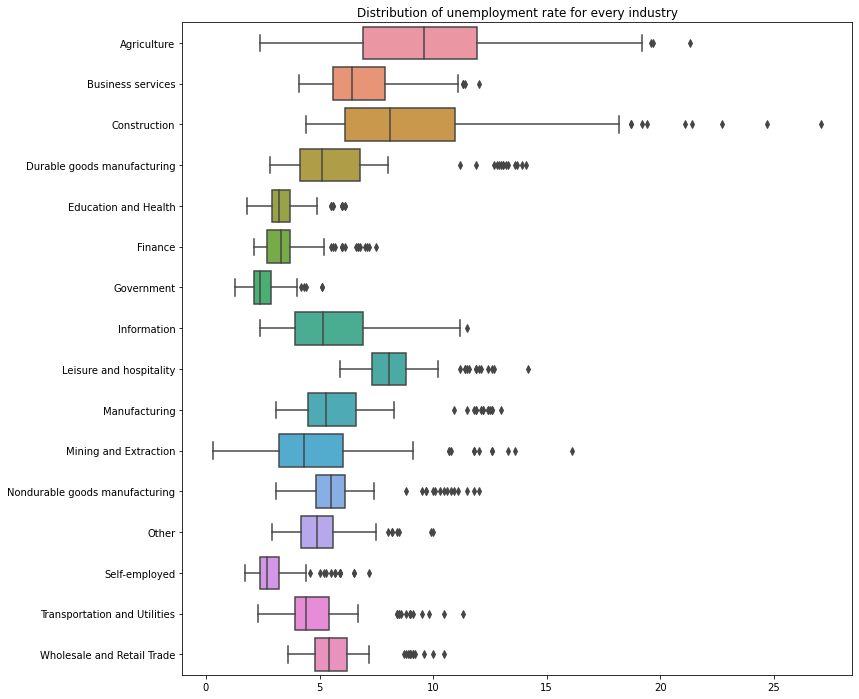

In [41]:
plt.figure(figsize=(12,12))
plt.title('Distribution of unemployment rate for every industry')
boxplot=sns.boxplot(data=df,orient='h')
plt.show()

### Q3. Using line chart Visualize the unemployment rate of workers by industry.

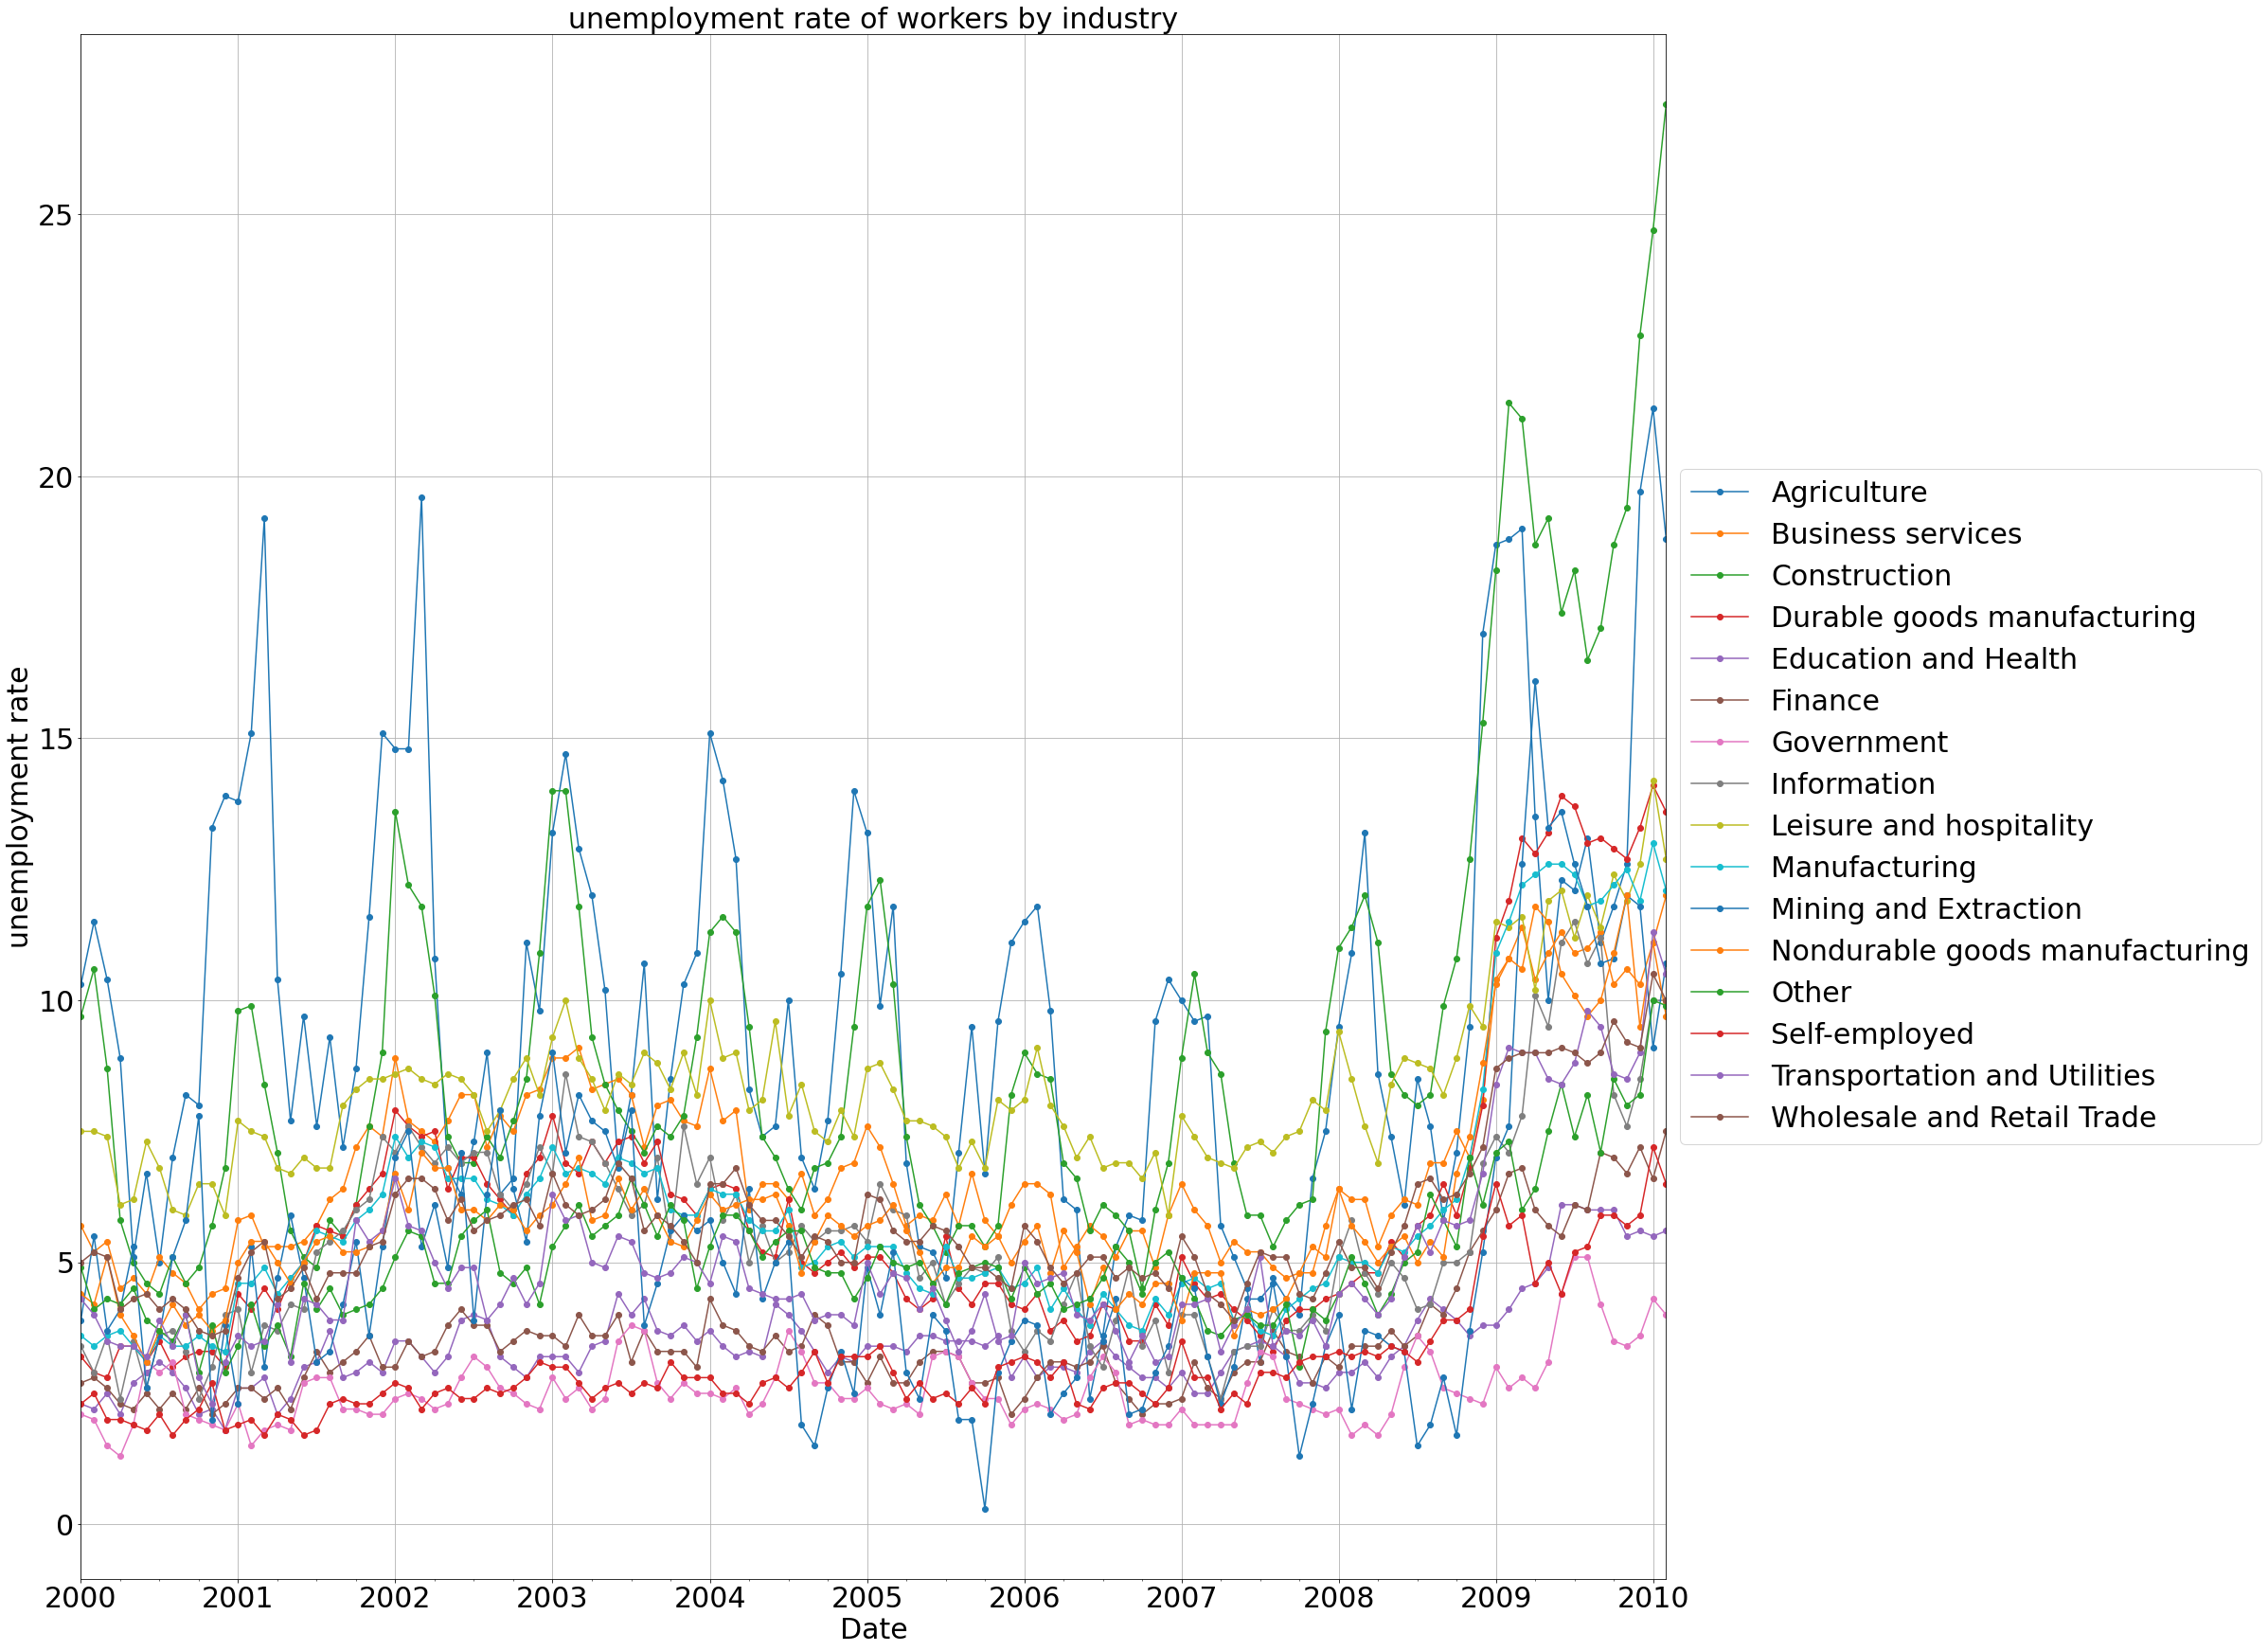

In [42]:
df.plot(figsize=(30,30),marker='o', fontsize=16, linewidth=1.5)
plt.legend(fontsize=30,loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=30)
plt.xlabel('Date',fontsize=30)
plt.ylabel('unemployment rate',fontsize=30)
plt.title('unemployment rate of workers by industry',fontsize=30)
plt.grid(True)
plt.show()

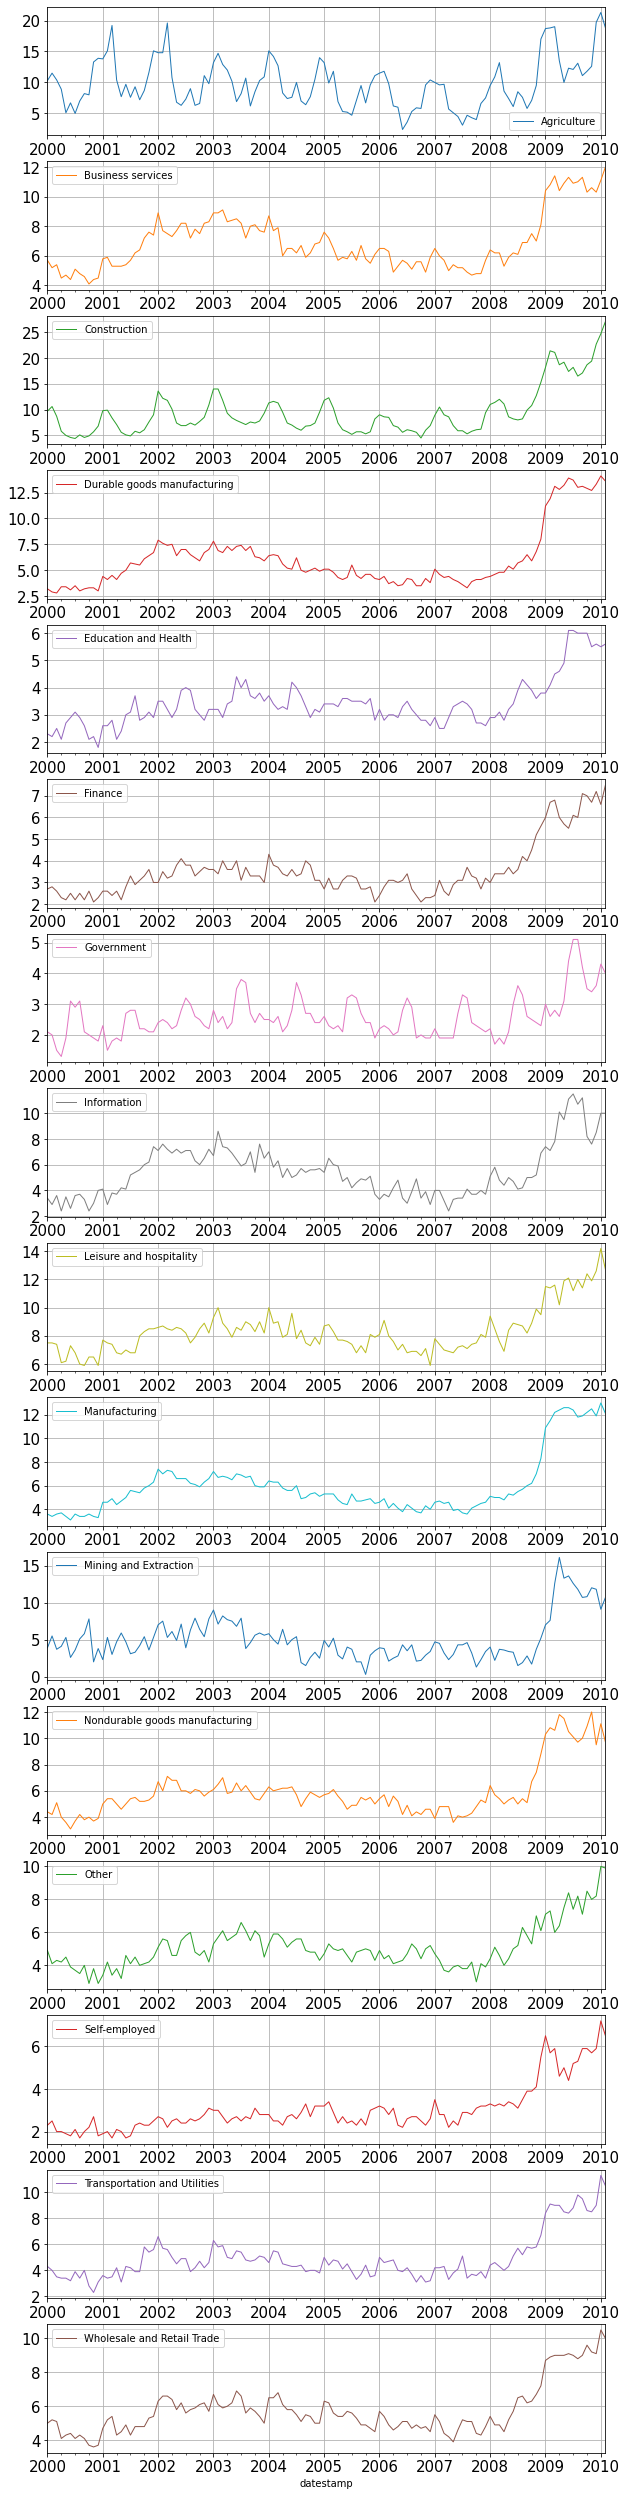

In [43]:
df.plot(subplots=True,layout=(16,1),sharex=False,sharey=False,linewidth=1,fontsize=15,legend=True,
           figsize=(10,45),grid=True)
plt.show()

### Q4. Plot the monthly and yearly trends.

### Monthly :

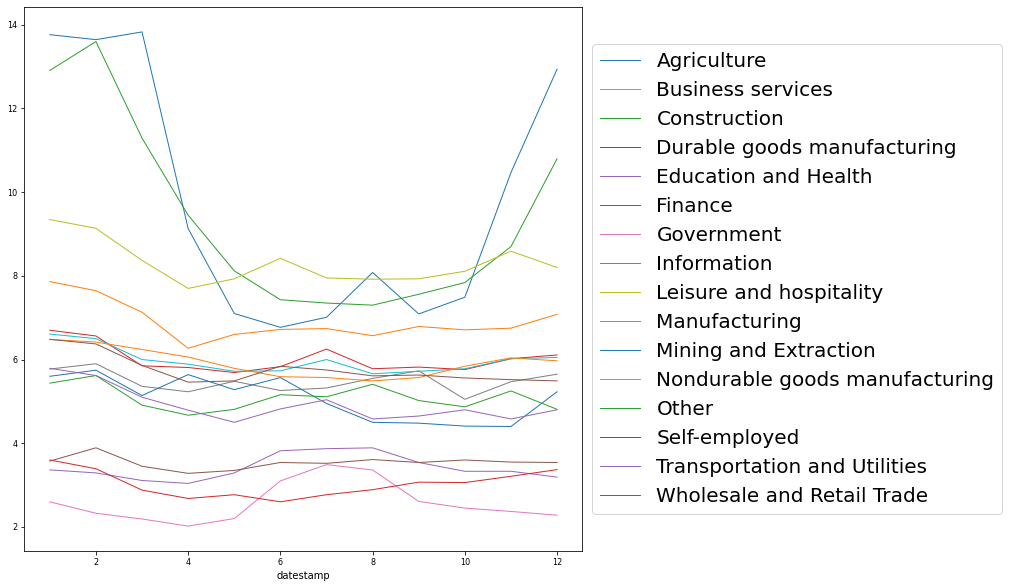

In [44]:
index_month = df.index.month
by_month = df.groupby(index_month).mean()
axis = by_month.plot(fontsize=8, linewidth=1,figsize=(10,10));
plt.legend(fontsize=20,loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel('Month', fontsize=20);
ax.set_ylabel('Mean unemployment rate', fontsize=20);

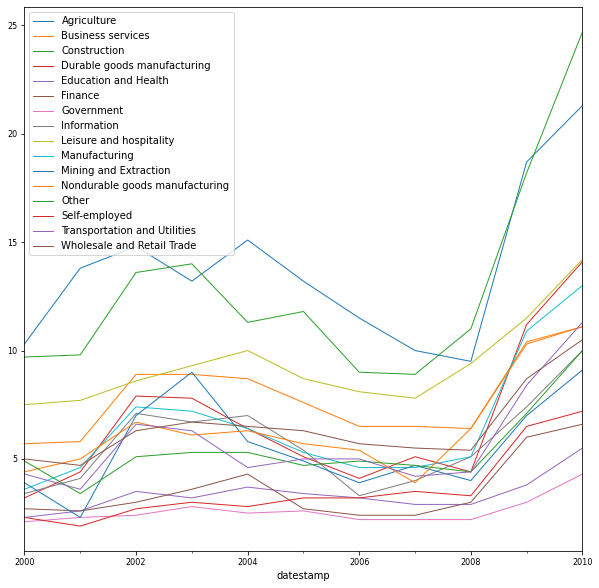

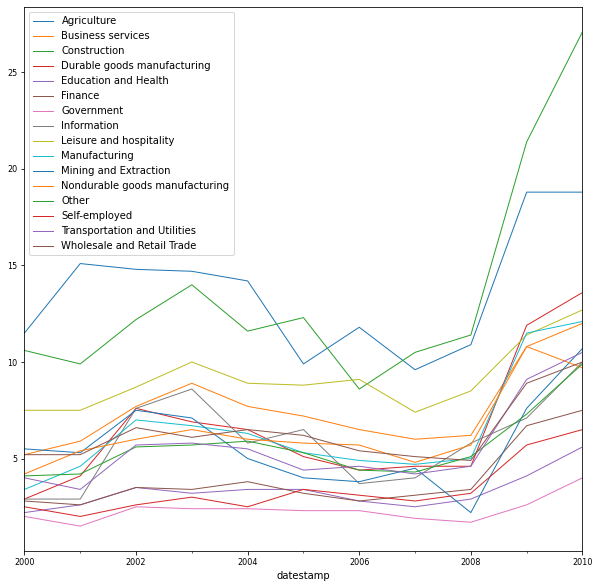

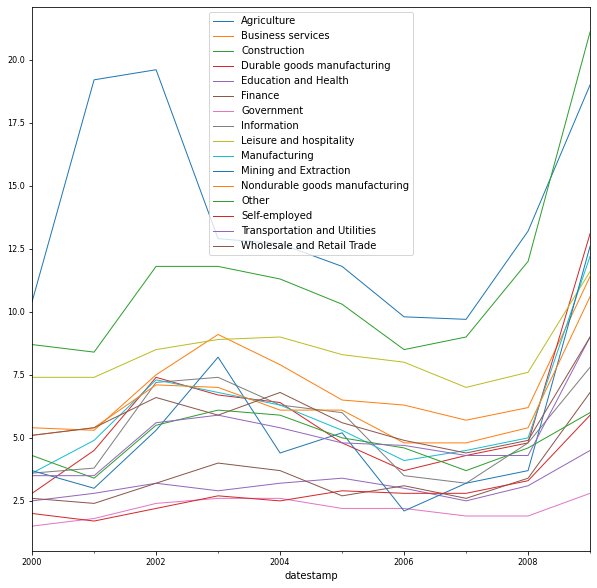

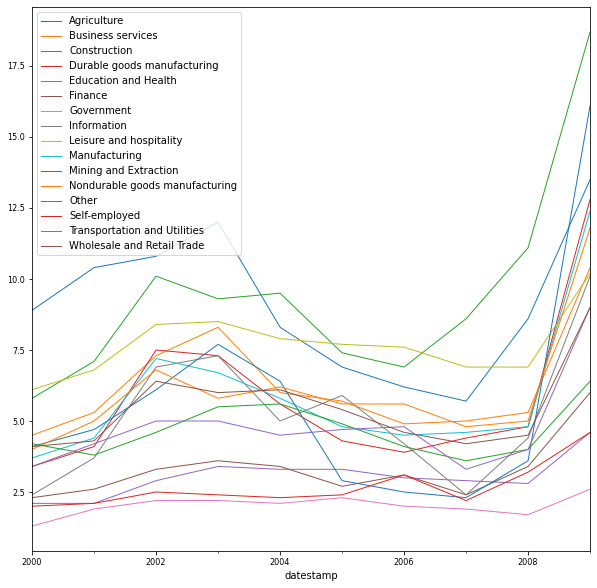

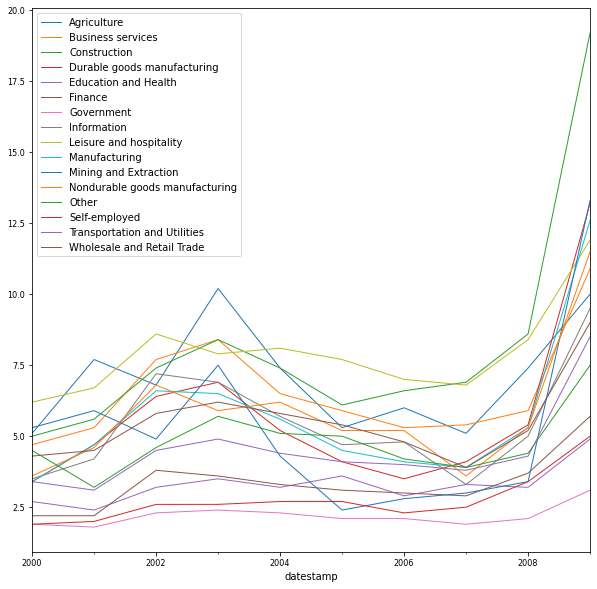

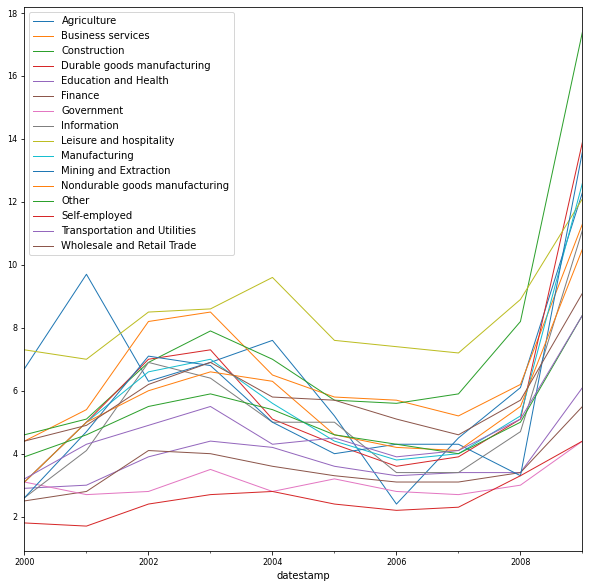

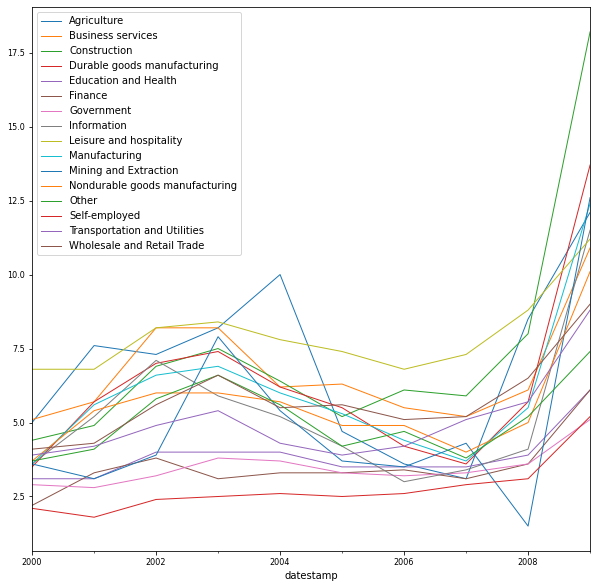

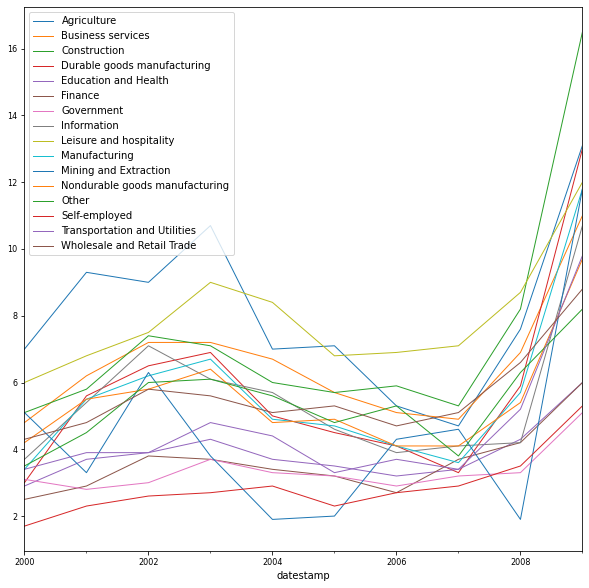

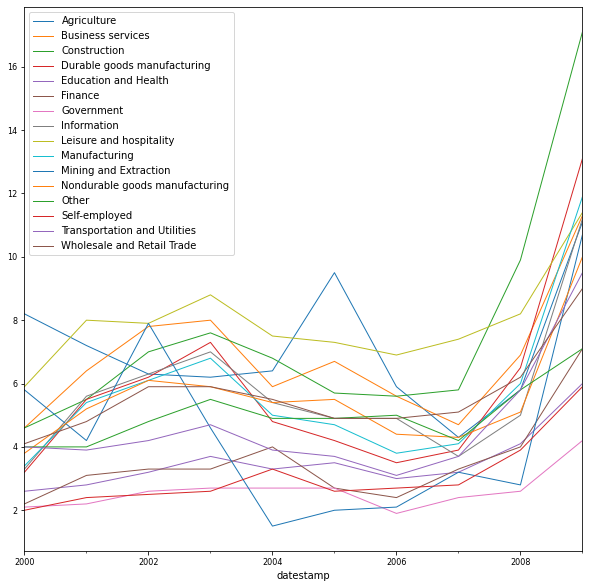

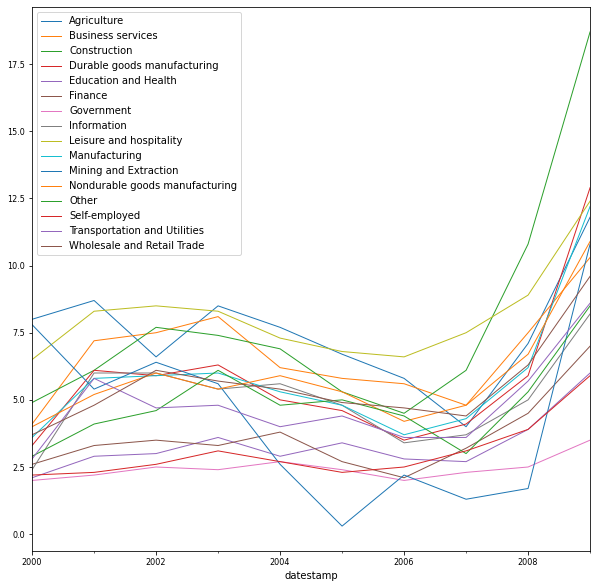

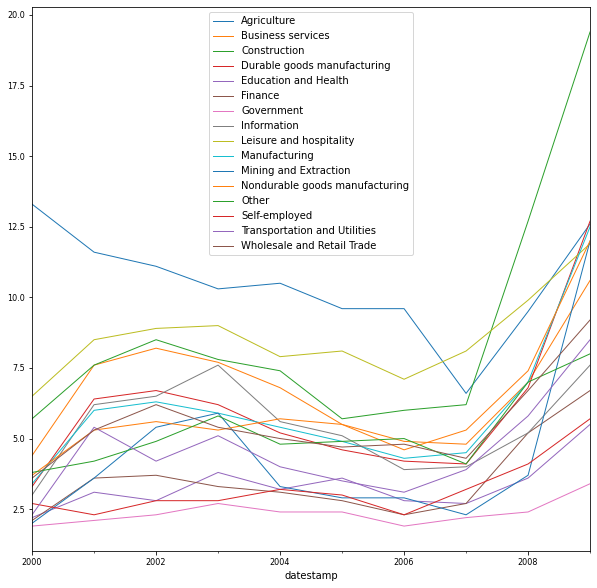

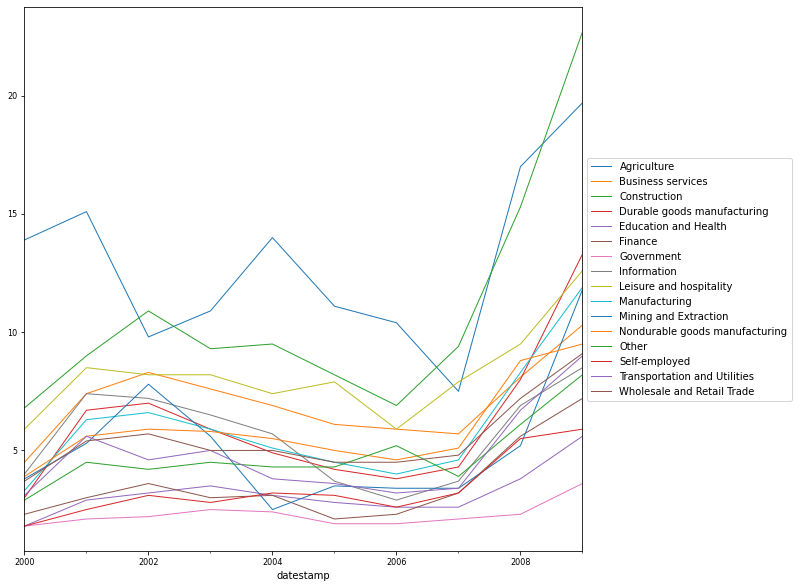

In [45]:
index_month = df.index.month
jobs_by_month = df.groupby(index_month)
axis = jobs_by_month.plot(fontsize=8, linewidth=1,figsize=(10,10));
plt.legend(fontsize=10,loc='center left', bbox_to_anchor=(1.0, 0.5))

### Yearly :

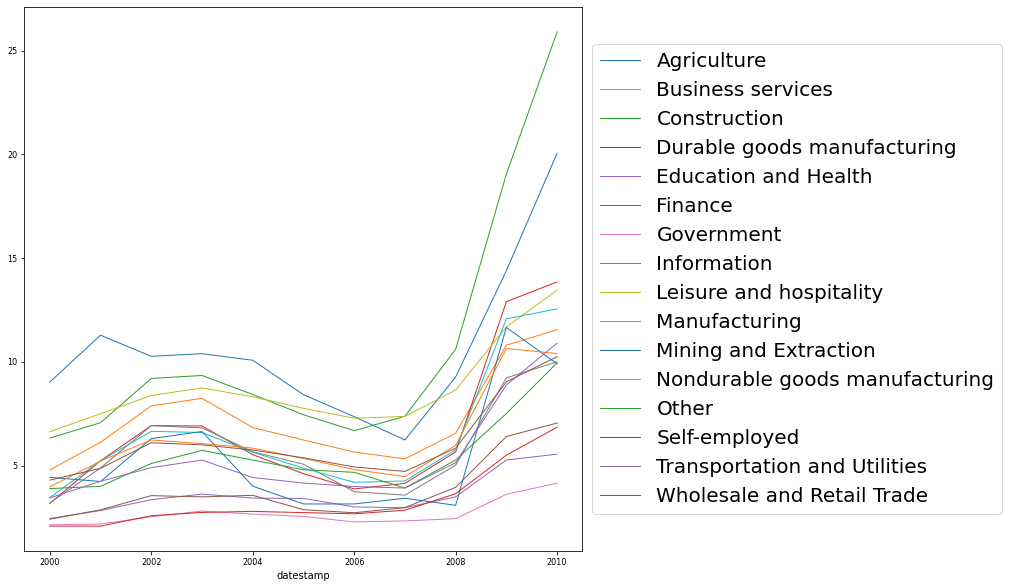

In [46]:
index_year = df.index.year
by_year = df.groupby(index_year).mean()
axis = by_year.plot(fontsize=8, linewidth=1,figsize=(10,10));
plt.legend(fontsize=20,loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_xlabel('Year', fontsize=20);
ax.set_ylabel('Mean unemployment rate', fontsize=20);

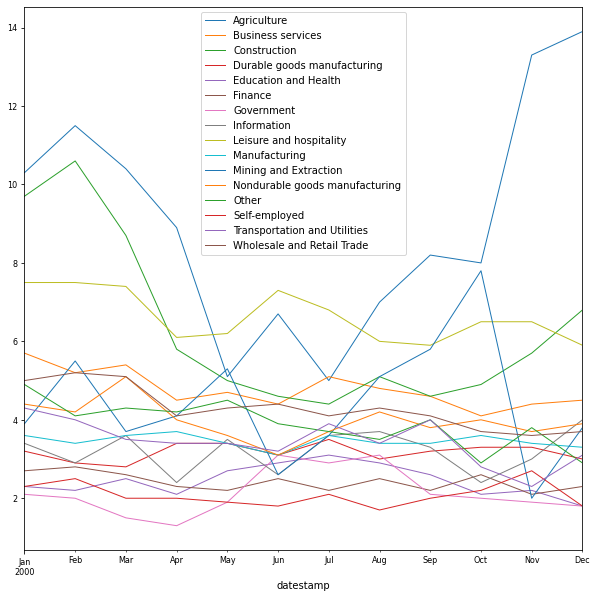

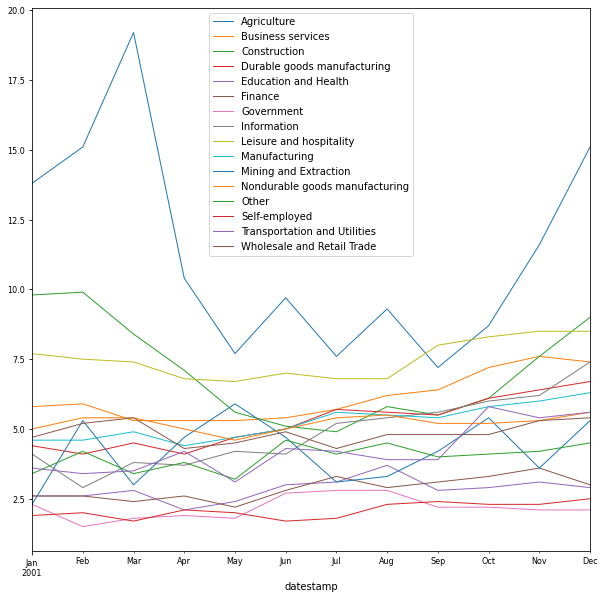

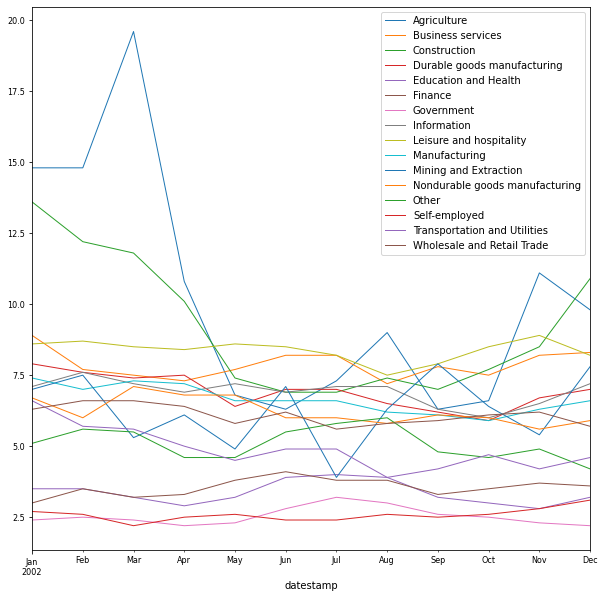

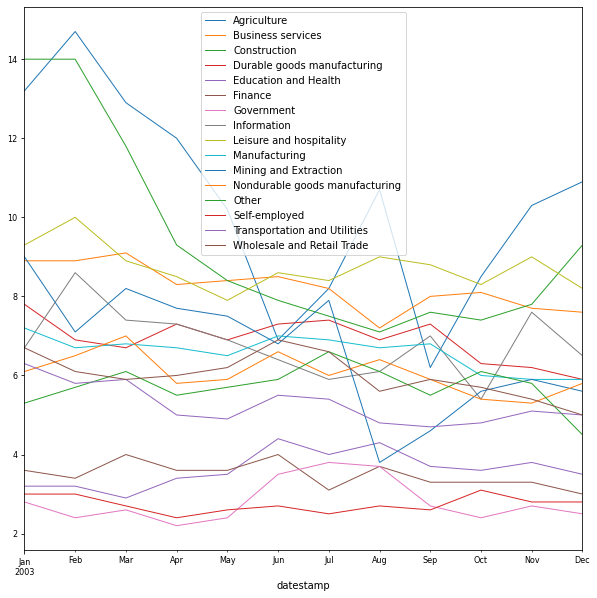

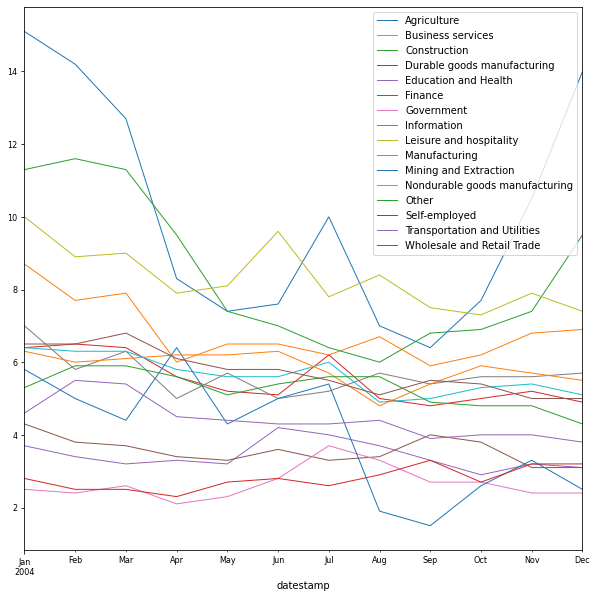

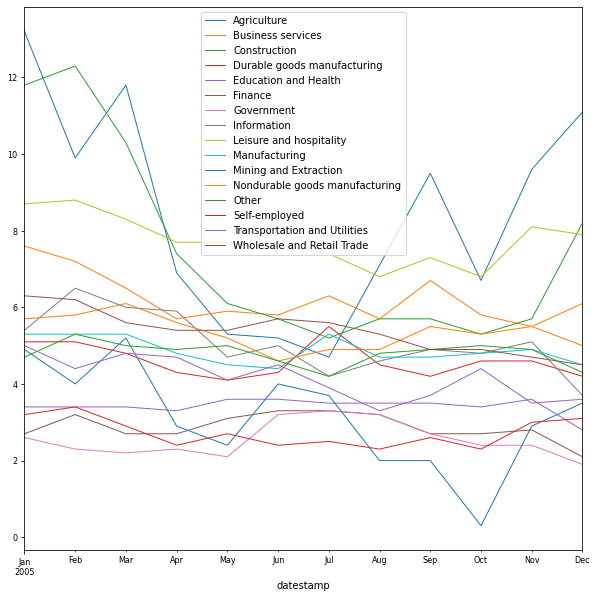

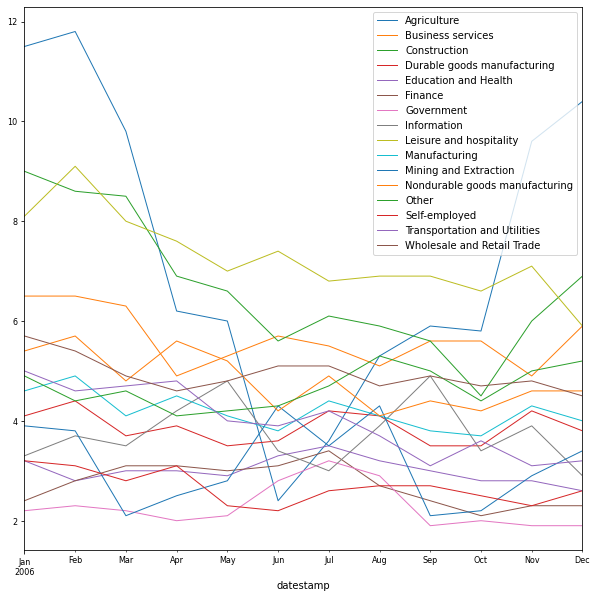

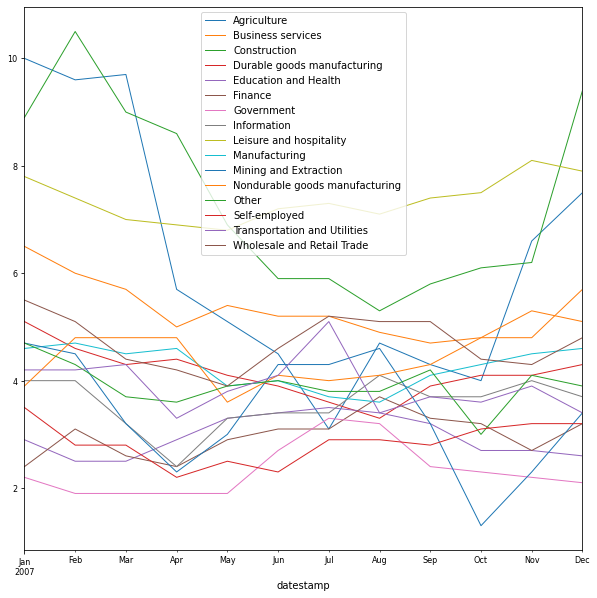

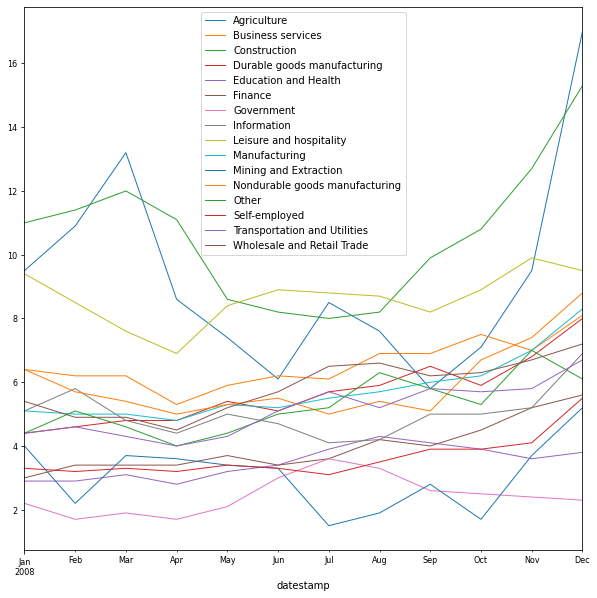

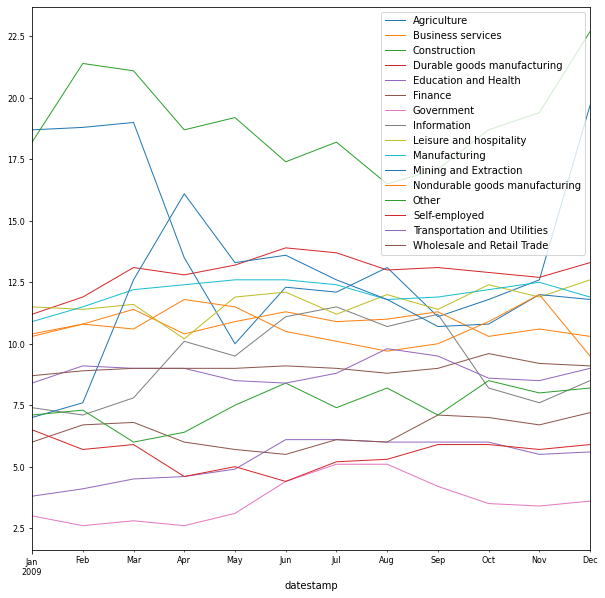

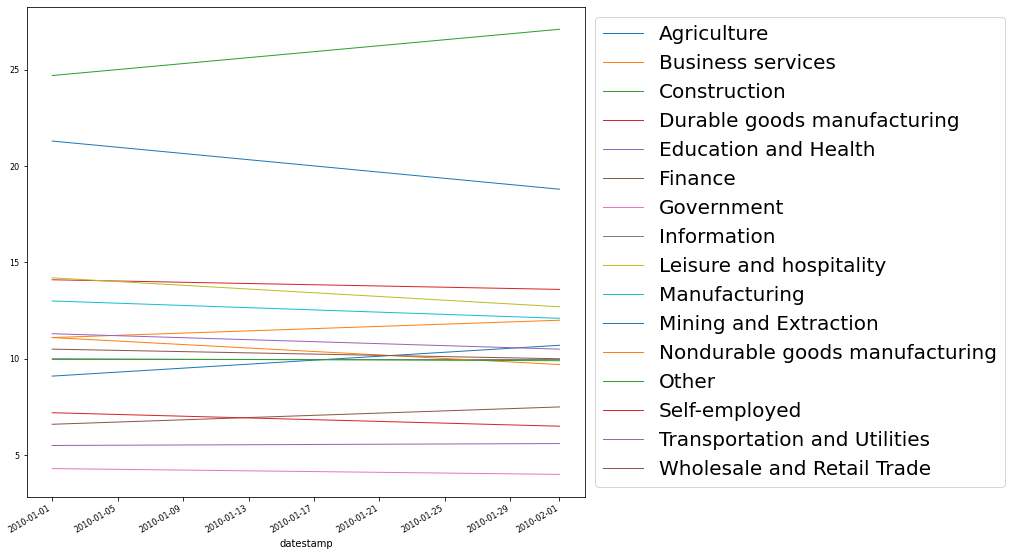

In [47]:
index_year = df.index.year
jobs_by_year = df.groupby(index_year)
axis = jobs_by_year.plot(fontsize=8, linewidth=1,figsize=(10,10));
plt.legend(fontsize=20,loc='center left', bbox_to_anchor=(1.0, 0.5))

### Q5. Apply time series decomposition to your dataset to visualize the trend and seasonality.

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [49]:
col = df.columns
for i in col:

    result = seasonal_decompose(x=df[i], model='additive')

    trend_estimate = result.trend

    seasonal_estimate = result.seasonal  

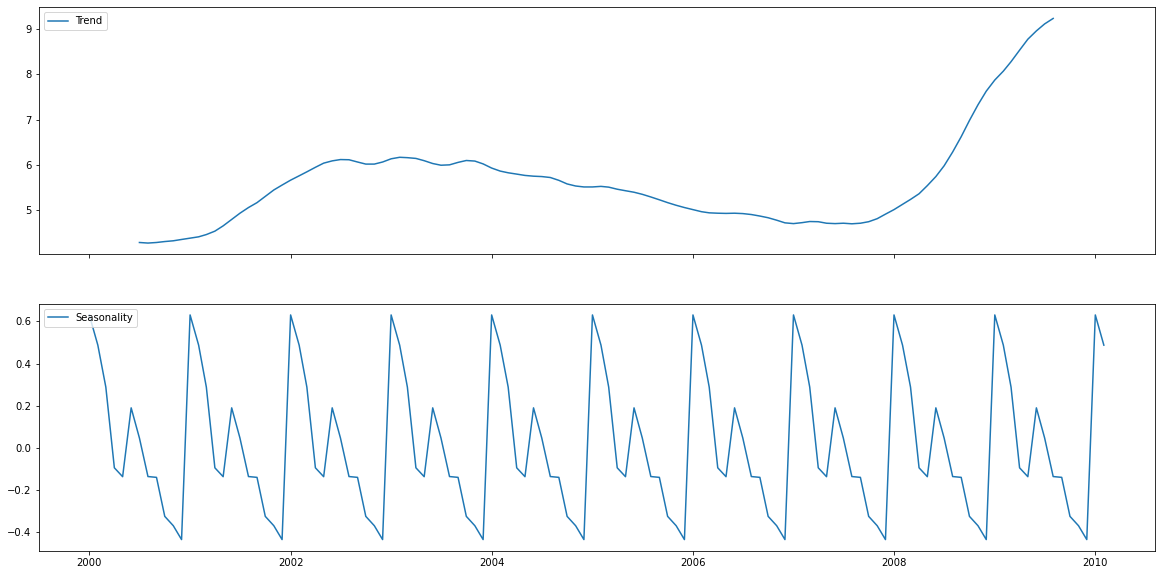

In [50]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(20)

# plot to be for trend
axes[0].plot(trend_estimate, label='Trend')
axes[0].legend(loc='upper left');
# plot to be Seasonality component
axes[1].plot(seasonal_estimate, label='Seasonality')
axes[1].legend(loc='upper left');


### Q6. Visualize the seasonality of Agriculture, Health and Finance sector.

In [51]:
seasonal={}
for i in df[['Agriculture','Education and Health','Finance']]:
    result = seasonal_decompose(x=df[i])
    seasonal[i]=result.seasonal
    
seasonality_df = pd.DataFrame.from_dict(seasonal)
seasonality_df.index.name = None
seasonality_df

Agriculture  Education and Health   Finance
2000-01-01     3.748816             -0.060934 -0.024861
2000-02-01     3.687704             -0.178063  0.218657
2000-03-01     4.546038             -0.185934  0.113102
2000-04-01    -0.540536             -0.253063 -0.085509
2000-05-01    -2.388221             -0.075285 -0.038287
...                 ...                   ...       ...
2009-10-01    -2.399796             -0.196582 -0.040602
2009-11-01     0.778445             -0.162785 -0.096157
2009-12-01     2.685390             -0.354452 -0.192917
2010-01-01     3.748816             -0.060934 -0.024861
2010-02-01     3.687704             -0.178063  0.218657

[122 rows x 3 columns]

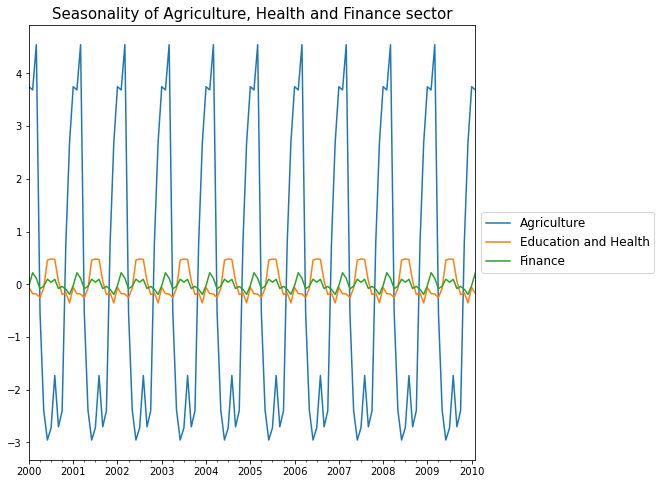

In [52]:
seasonality_df.plot(figsize=(8,8))
plt.legend(fontsize=12,loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Seasonality of Agriculture, Health and Finance sector',fontsize=15)
plt.show()

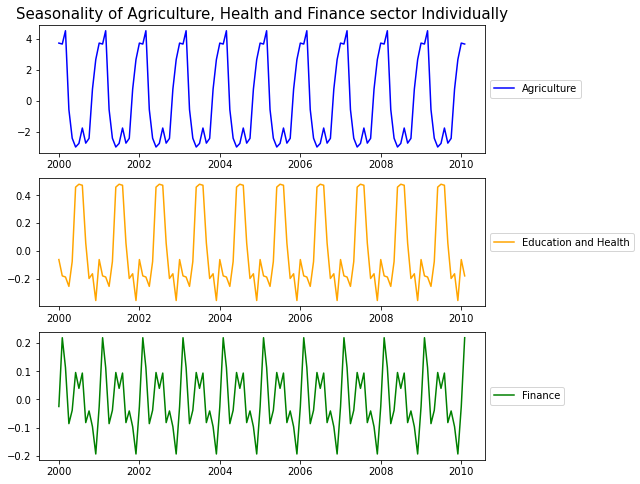

In [53]:
fig, axes=plt.subplots(3,1,figsize=(8,8))
axes[0].set_title('Seasonality of Agriculture, Health and Finance sector Individually',fontsize=15)
axes[0].plot(seasonality_df['Agriculture'],color='blue', label="Agriculture")
axes[1].plot(seasonality_df['Education and Health'], color='orange', label="Education and Health")
axes[2].plot(seasonality_df['Finance'], color='green', label="Finance")

axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes[2].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.show()

### Q7. Visualize the seasonality of multiple time series and the correlation between each time series in the dataset.

In [54]:
newdf={}
cols=df.columns
for i in cols:
    result = seasonal_decompose(x=df[i])
    newdf[i]=result.seasonal
    
newdf1 = pd.DataFrame.from_dict(newdf)
newdf1.index.name = None
newdf1

Agriculture  Business services  Construction  \
2000-01-01     3.748816           0.981096      3.184209   
2000-02-01     3.687704           0.614429      3.545320   
2000-03-01     4.546038           0.443596      2.579117   
2000-04-01    -0.540536          -0.471682      0.735135   
2000-05-01    -2.388221          -0.184645     -0.781069   
...                 ...                ...           ...   
2009-10-01    -2.399796          -0.276775     -1.764402   
2009-11-01     0.778445          -0.321682     -1.012087   
2009-12-01     2.685390           0.017670      0.829579   
2010-01-01     3.748816           0.981096      3.184209   
2010-02-01     3.687704           0.614429      3.545320   

            Durable goods manufacturing  Education and Health   Finance  \
2000-01-01                     0.567948             -0.060934 -0.024861   
2000-02-01                     0.396651             -0.178063  0.218657   
2000-03-01                     0.304522             -0.185934  0.113102   
2000-04-01                     0.103133             -0.253063 -0.085509   
2000-05-01                    -0.118164             -0.075285 -0.038287   
...                                 ...                   ...       ...   
2009-10-01                    -0.450571             -0.196582 -0.040602   
2009-11-01                    -0.228349             -0.162785 -0.096157   
2009-12-01                    -0.290386             -0.354452 -0.192917   
2010-01-01                     0.567948             -0.060934 -0.024861   
2010-02-01                     0.396651             -0.178063  0.218657   

            Government  Information  Leisure and hospitality  Manufacturing  \
2000-01-01   -0.040779     0.195768                 0.905135       0.527751   
2000-02-01   -0.349113     0.337897                 0.768098       0.437010   
2000-03-01   -0.279205     0.046694                 0.270413       0.403214   
2000-04-01   -0.462539    -0.027843                -0.382365       0.190714   
2000-05-01   -0.343094     0.079564                -0.190235      -0.046786   
...                ...          ...                      ...            ...   
2009-10-01   -0.134761    -0.464417                -0.336069      -0.384749   
2009-11-01   -0.224113     0.005490                 0.207450      -0.234286   
2009-12-01   -0.357909     0.038360                -0.352272      -0.220860   
2010-01-01   -0.040779     0.195768                 0.905135       0.527751   
2010-02-01   -0.349113     0.337897                 0.768098       0.437010   

            Mining and Extraction  Nondurable goods manufacturing     Other  \
2000-01-01               0.626319                        0.460610  0.094796   
2000-02-01               0.375856                        0.505517  0.378129   
2000-03-01               0.399931                        0.518017  0.008684   
2000-04-01               0.874468                        0.379591 -0.287149   
2000-05-01               0.280949                        0.053665 -0.210297   
...                           ...                             ...       ...   
2009-10-01              -0.800532                       -0.254205 -0.330667   
2009-11-01              -1.037569                       -0.226890  0.123036   
2009-12-01              -0.181088                       -0.097724 -0.422797   
2010-01-01               0.626319                        0.460610  0.094796   
2010-02-01               0.375856                        0.505517  0.378129   

            Self-employed  Transportation and Utilities  \
2000-01-01       0.470752                      0.652473   
2000-02-01       0.239734                      0.511269   
2000-03-01       0.038345                      0.478399   
2000-04-01      -0.219063                      0.092751   
2000-05-01      -0.138970                     -0.285027   
...                   ...                           ...   
2009-10-01      -0.050081                     -0.170212   
2009-11-01       0.1

In [55]:
seasonality_corr = newdf1.corr()
seasonality_corr 

Agriculture  Business services  Construction  \
Agriculture                        1.000000           0.770783      0.917625   
Business services                  0.770783           1.000000      0.838841   
Construction                       0.917625           0.838841      1.000000   
Durable goods manufacturing        0.564793           0.772484      0.730657   
Education and Health              -0.582759          -0.205095     -0.560243   
Finance                            0.160217           0.394845      0.274704   
Government                        -0.511086          -0.187406     -0.555158   
Information                        0.630649           0.603128      0.695753   
Leisure and hospitality            0.690316           0.875450      0.756613   
Manufacturing                      0.687746           0.798472      0.861329   
Mining and Extraction              0.280770           0.456233      0.554234   
Nondurable goods manufacturing     0.765291           0.703514      0.929159   
Other                              0.105392           0.322679      0.107181   
Self-employed                      0.796930           0.742740      0.711484   
Transportation and Utilities       0.609006           0.829282      0.782625   
Wholesale and Retail Trade         0.487311           0.842259      0.683148   

                                Durable goods manufacturing  \
Agriculture                                        0.564793   
Business services                                  0.772484   
Construction                                       0.730657   
Durable goods manufacturing                        1.000000   
Education and Health                               0.034038   
Finance                                            0.507113   
Government                                         0.015640   
Information                                        0.569466   
Leisure and hospitality                            0.734902   
Manufacturing                                      0.961124   
Mining and Extraction                              0.688888   
Nondurable goods manufacturing                     0.749133   
Other                                              0.408406   
Self-employed                                      0.348628   
Transportation and Utilities                       0.928982   
Wholesale and Retail Trade                         0.896596   

                                Education and Health   Finance  Government  \
Agriculture                                -0.582759  0.160217   -0.511086   
Business services                          -0.205095  0.394845   -0.187406   
Construction                               -0.560243  0.274704   -0.555158   
Durable goods manufacturing                 0.034038  0.507113    0.015640   
Education and Health                        1.000000  0.405289    0.954632   
Finance                                     0.405289  1.000000    0.320178   
Government                                  0.954632  0.320178    1.000000   
Information                                -0.175637  0.305021   -0.278310   
Leisure and hospitality                    -0.162785  0.480333   -0.209124   
Manufacturing                              -0.203643  0.457652   -0.237614   
Mining and Extraction                      -0.024151  0.314760   -0.158974   
Nondurable goods manufacturing             -0.542029  0.301173   -0.594446   
Other                                       0.572170  0.768028    0.492339   
Self-employed                              -0.547234 -0.114368   -0.440784   
Transportation and Utilities               -0.076027  0.561360   -0.070204   
Wholesale and Retail Trade                  0.138213  0.670741    0.063455   

                                Information  Leisure and hospitality  \
Agriculture                        0.630649                 0.690316   
Business services                  0.603128                 0.875450   
Construction                       0.695753             

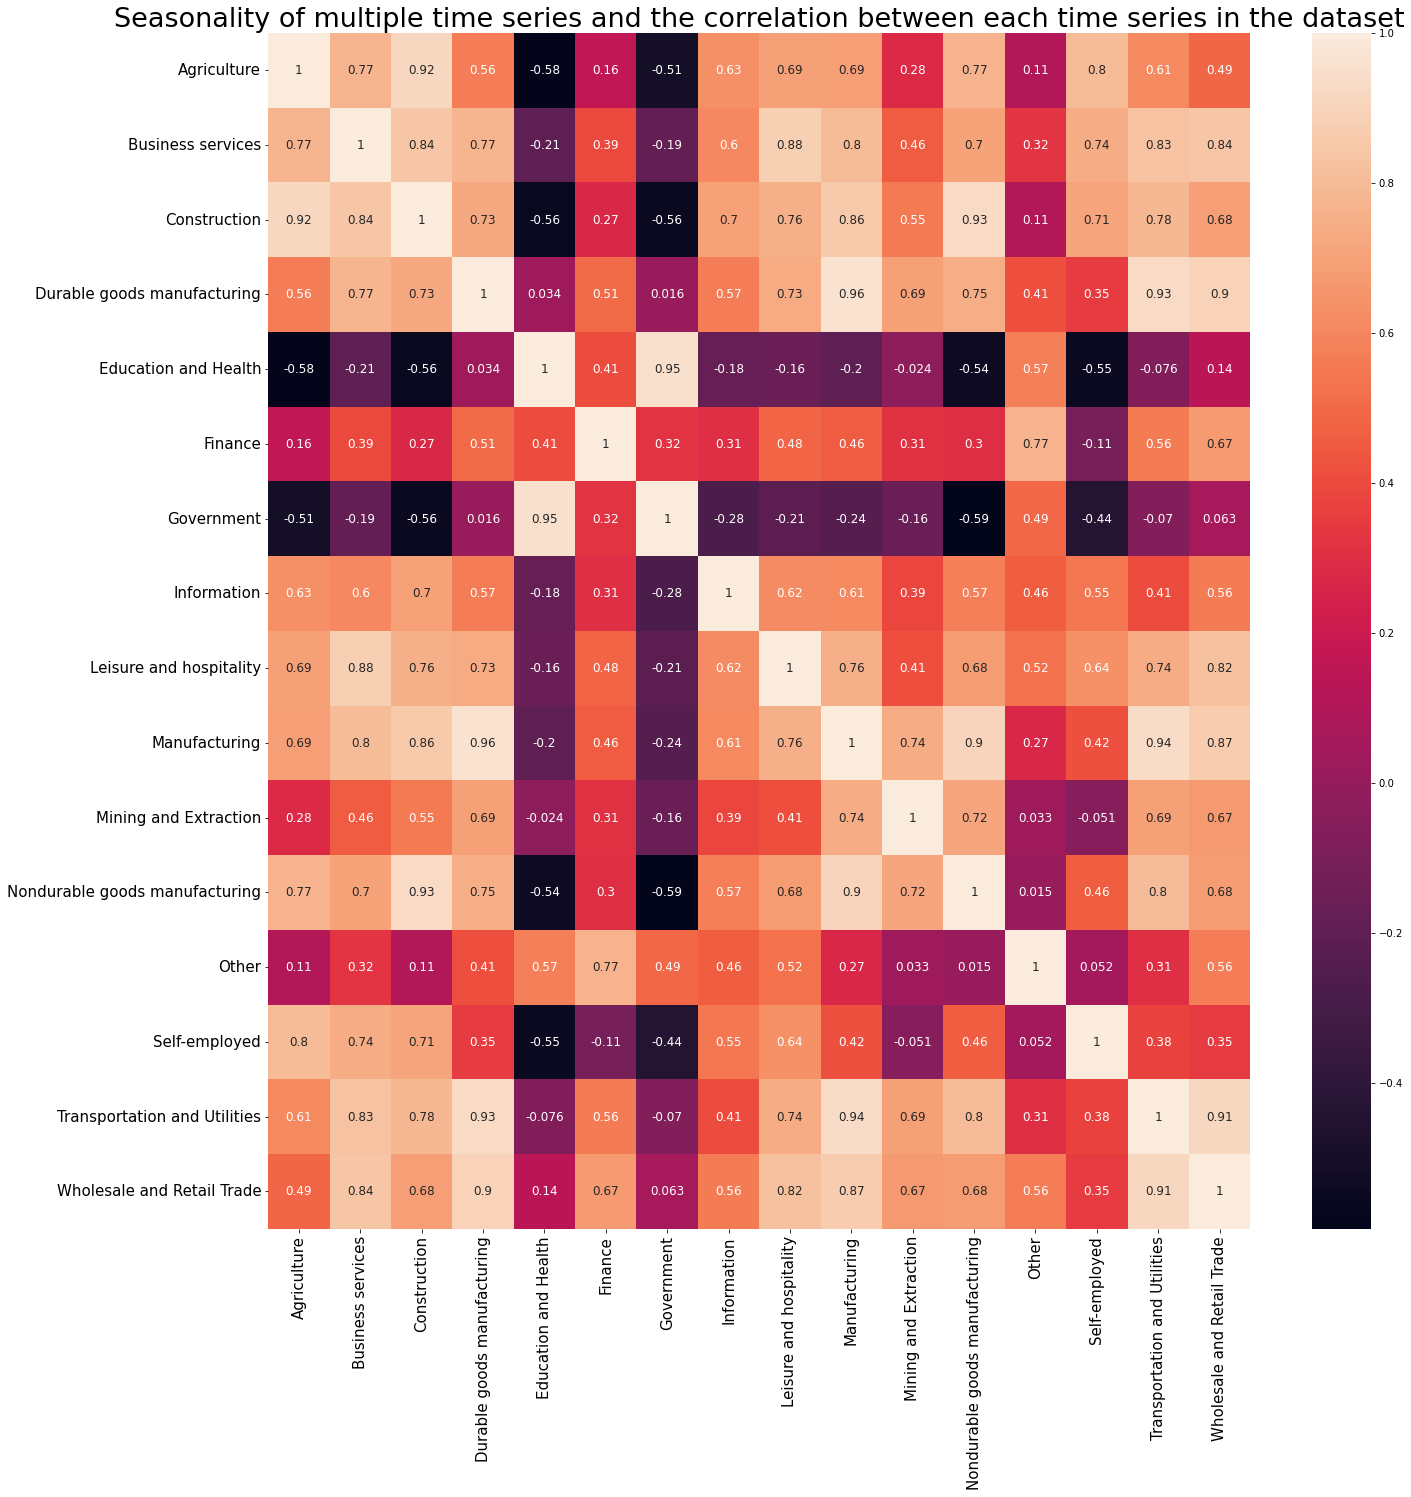

In [56]:
plt.figure(figsize=(22,22))
plot=sns.heatmap(seasonality_corr, annot=True,annot_kws={"size": 12})
plot.set_xticklabels(plot.get_xmajorticklabels(), fontsize = 15)
plot.set_yticklabels(plot.get_ymajorticklabels(), fontsize = 15)
plot.set_title('Seasonality of multiple time series and the correlation between each time series in the dataset',fontsize = 27)
plt.show()